In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier , ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#importing dataset
df1=pd.read_csv("/kaggle/input/sepsis-survival-minimal-clinical-records/s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_primary_cohort.csv")
df2=pd.read_csv("/kaggle/input/sepsis-survival-minimal-clinical-records/s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_study_cohort.csv")
df3=pd.read_csv("/kaggle/input/sepsis-survival-minimal-clinical-records/s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_validation_cohort.csv")

In [3]:
#joining all dataset into a single df
df=pd.concat([df1,df2,df3],axis=0,ignore_index=True)

In [4]:
#first few rows of df
df.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [5]:
#no of rows and columns in df
df.shape

(129392, 4)

In [6]:
#name & datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129392 entries, 0 to 129391
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      129392 non-null  int64
 1   sex_0male_1female              129392 non-null  int64
 2   episode_number                 129392 non-null  int64
 3   hospital_outcome_1alive_0dead  129392 non-null  int64
dtypes: int64(4)
memory usage: 3.9 MB


In [7]:
#perform basic statistical operations in numeric columns
df.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,129392.000000,129392.000000,129392.000000,129392.000000
mean,64.170057,0.470075,1.356081,0.909307
std,23.644353,0.499106,0.756492,0.287174
min,0.000000,0.000000,1.000000,0.000000
25%,53.000000,0.000000,1.000000,1.000000
50%,70.000000,0.000000,1.000000,1.000000
75%,82.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


In [8]:
#check missing values
df.isnull().sum()

age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64

In [9]:
#renaming the name of columns
new_columns={
    'age_years':'Age',"sex_0male_1female":'Sex','episode_number':'Episode Number'
    ,'hospital_outcome_1alive_0dead':'Hospital Outcome'
}
df=df.rename(columns=new_columns)

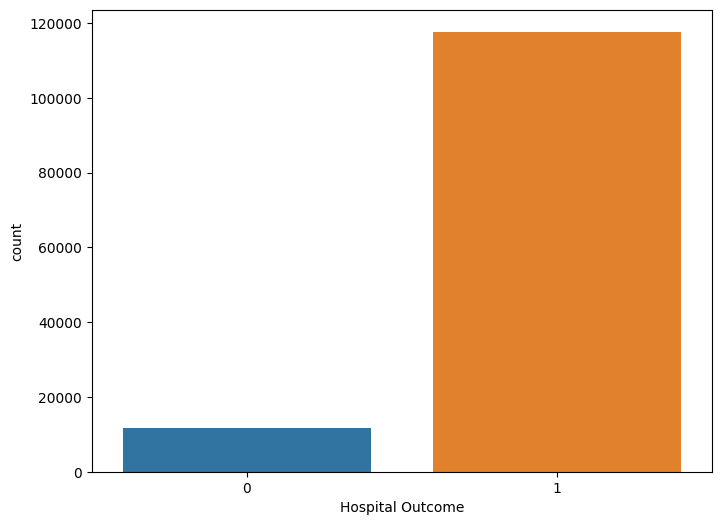

In [10]:
#countplot of Hospital Outcome column
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Hospital Outcome')
plt.show()

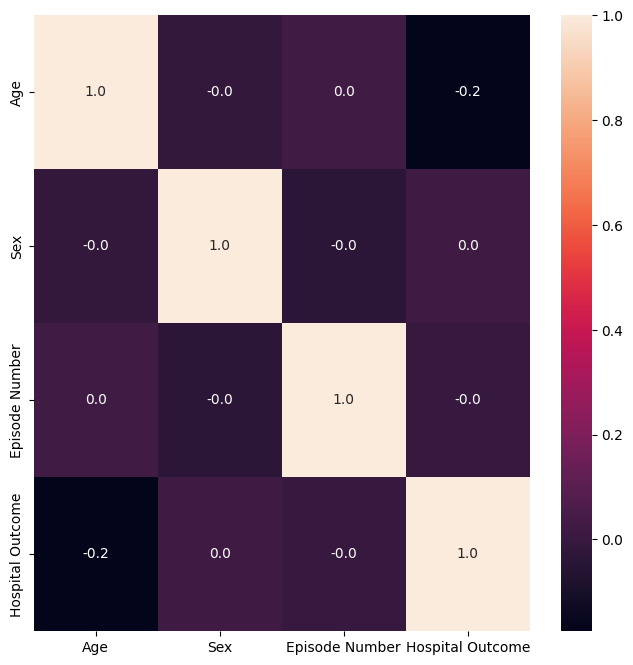

In [11]:
#heatmap of correlation between all columns
cor=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor, annot=True, fmt=".1f")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


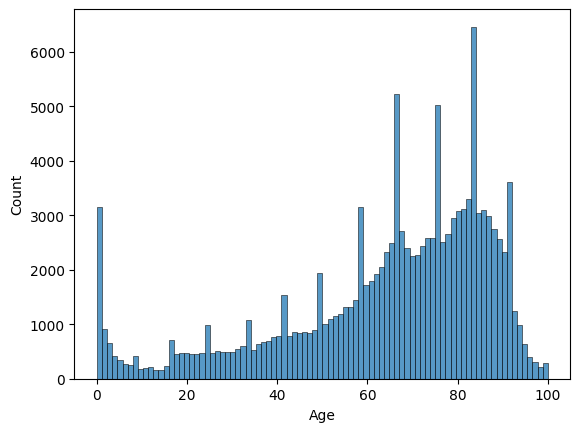

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


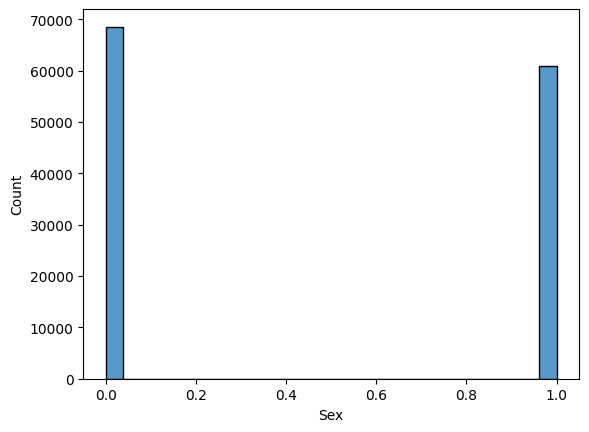

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


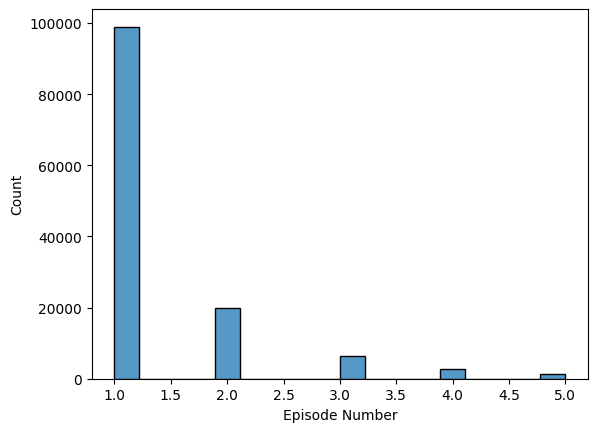

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


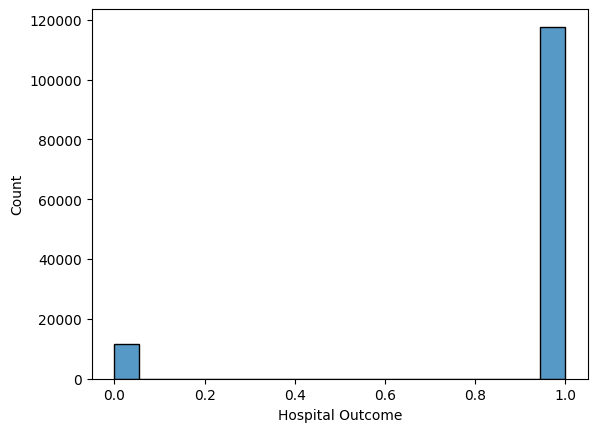

In [12]:
for i in df.columns:
    sns.histplot(data=df,x=i)
    plt.show()

Text(0.5, 1.0, 'Number of previous sepsis episodes')

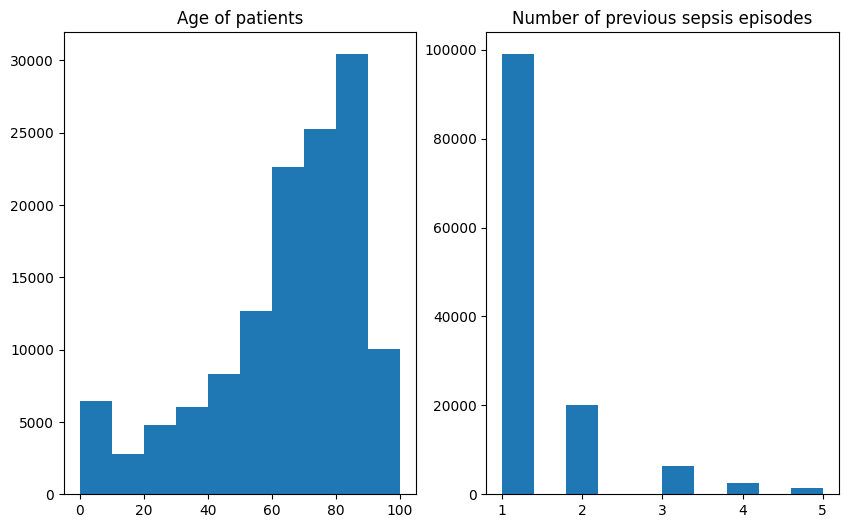

In [13]:
#distributions for age and for episode count 
figure, axis = plt.subplots(1,2, figsize = (10,6))

axis[0].hist(x = df["Age"])
axis[0].set_title("Age of patients")

axis[1].hist(x = df["Episode Number"])
axis[1].set_title("Number of previous sepsis episodes")

<Axes: xlabel='Episode Number', ylabel='Age'>

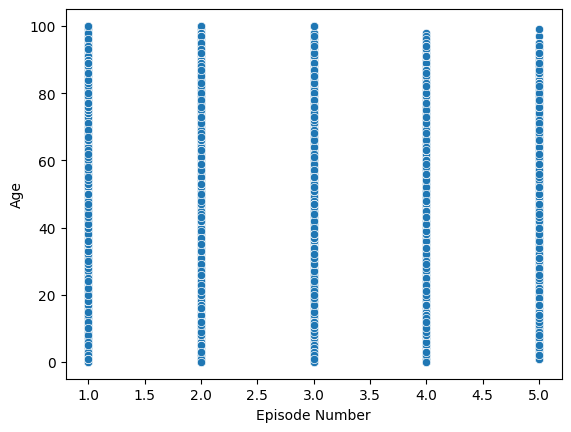

In [14]:
sns.scatterplot(df, x = "Episode Number", y = "Age") #not as much of an impact as I would have imagined

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


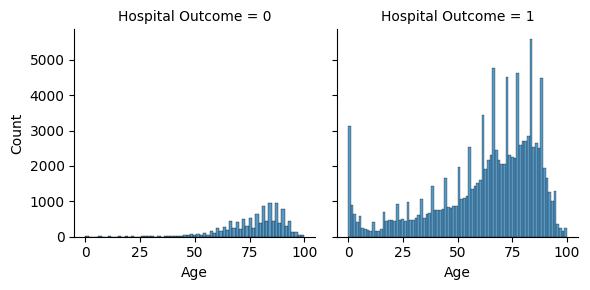

In [15]:
#facet grid for age and dead variables
x = sns.FacetGrid(df, col = "Hospital Outcome")
x.map_dataframe(sns.histplot, x = "Age")
#noticeably very few young people died, was seen in pivot table but this visualises distributional differences

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


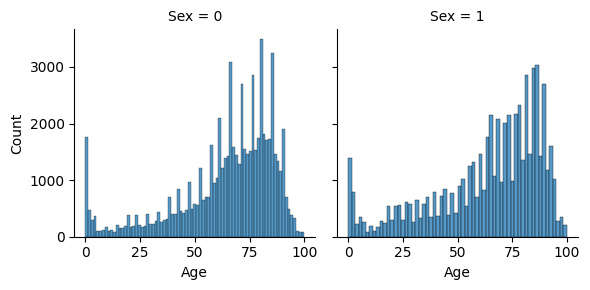

In [16]:
#facet grid for age and gender 
x = sns.FacetGrid(df, col = "Sex")
x.map_dataframe(sns.histplot, x = "Age")

In [17]:
# seperate the feature variables & target variable
X=df.drop(columns='Hospital Outcome')
Y=df['Hospital Outcome']

In [18]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [19]:
SS=StandardScaler()
X_train_transformed=SS.fit_transform(X_train)
X_test_transformed=SS.transform(X_test)

In [20]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'CatBoost': CatBoostClassifier(verbose=0),
    'LightGBM': LGBMClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

Accuracy for Logistic Regression: 0.9092


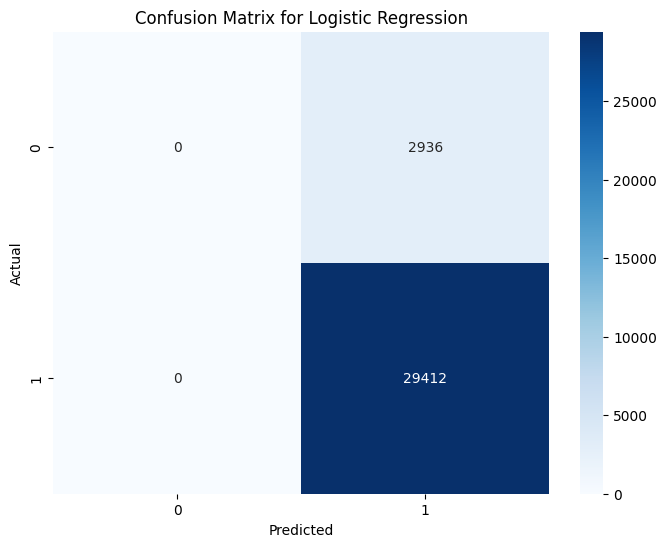

Accuracy for Random Forest: 0.9093


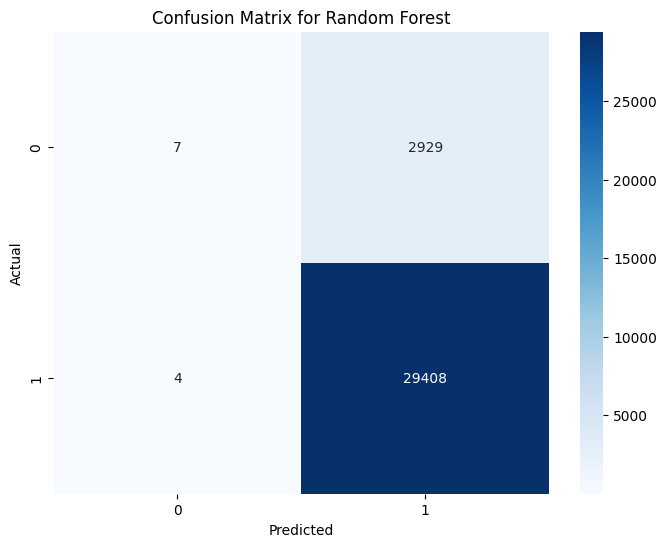

Accuracy for Gradient Boosting: 0.9092


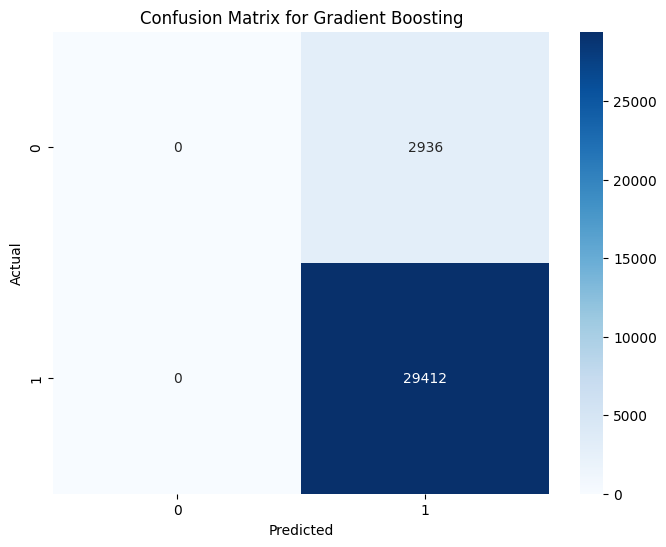

Accuracy for AdaBoost: 0.9092


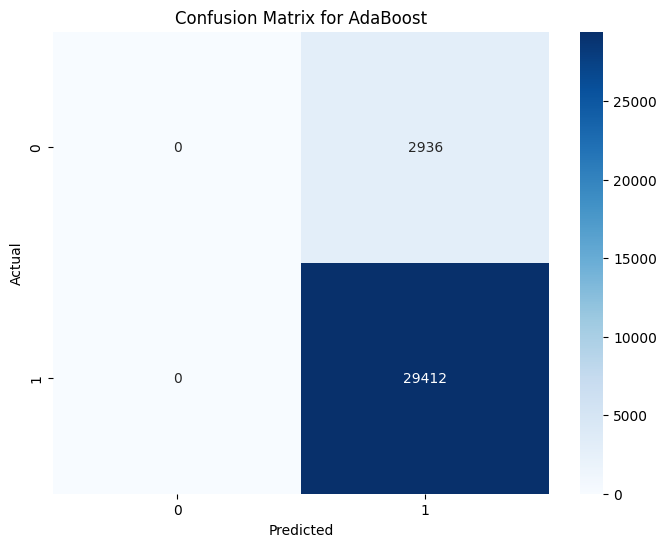

Accuracy for Decision Tree: 0.9093


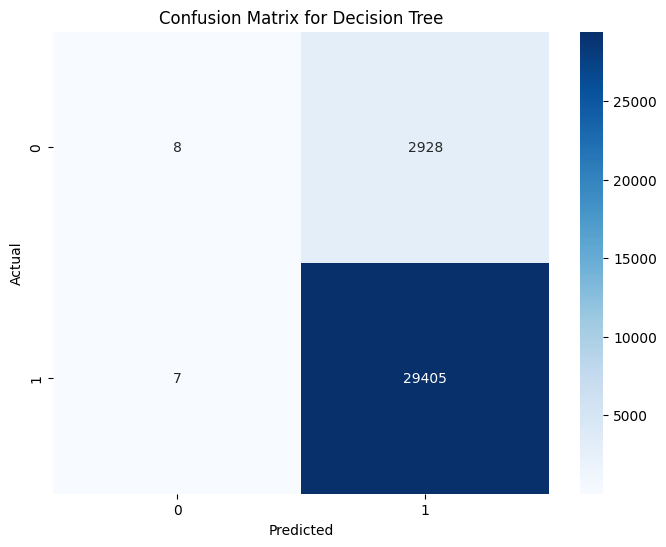

Accuracy for k-NN: 0.9046


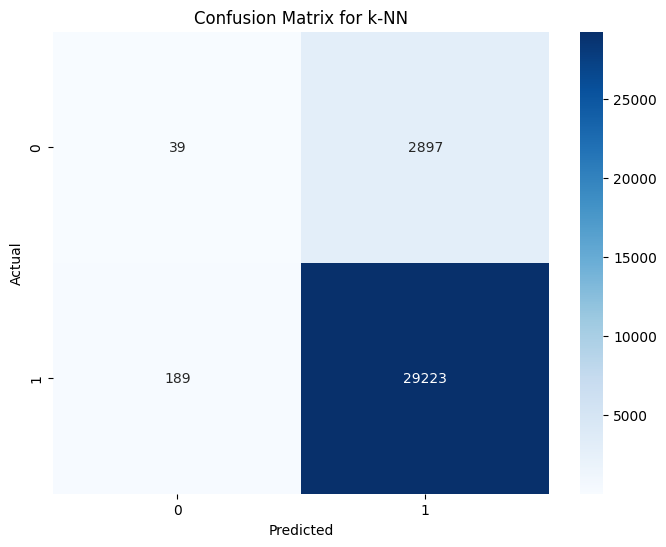

Accuracy for XGBoost: 0.9092


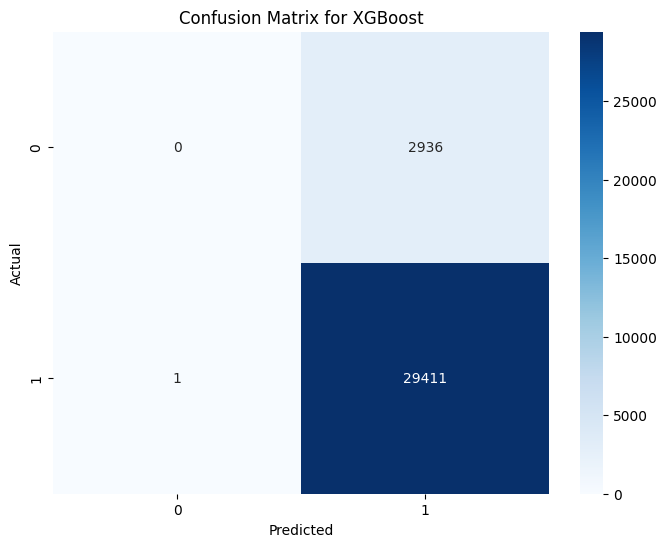

Accuracy for CatBoost: 0.9093


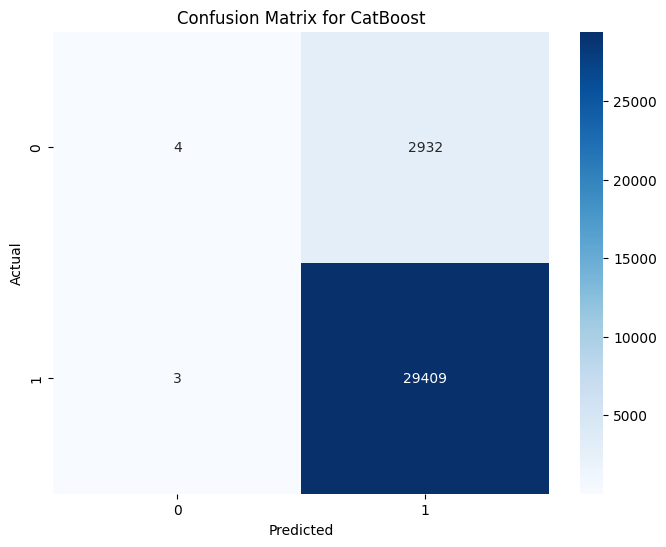

[LightGBM] [Info] Number of positive: 88245, number of negative: 8799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 97044, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.909330 -> initscore=2.305479
[LightGBM] [Info] Start training from score 2.305479
Accuracy for LightGBM: 0.9092


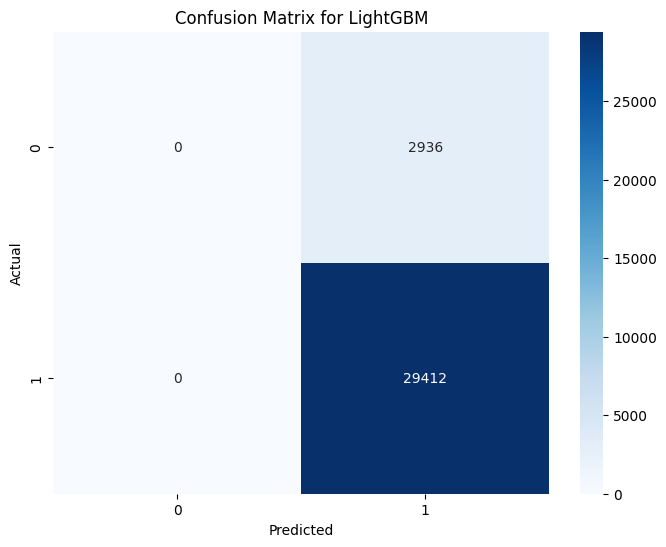

Accuracy for Extra Trees: 0.9093


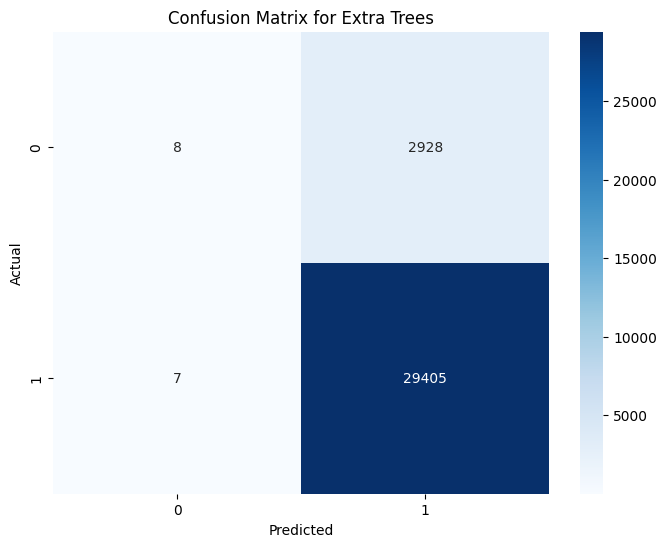

In [21]:
results={}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_transformed, Y_train)
    Y_pred = model.predict(X_test_transformed)
    accuracy = accuracy_score(Y_test, Y_pred)
    results[name] = accuracy
    print(f"Accuracy for {name}: {accuracy:.4f}")
    
    # Compute confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

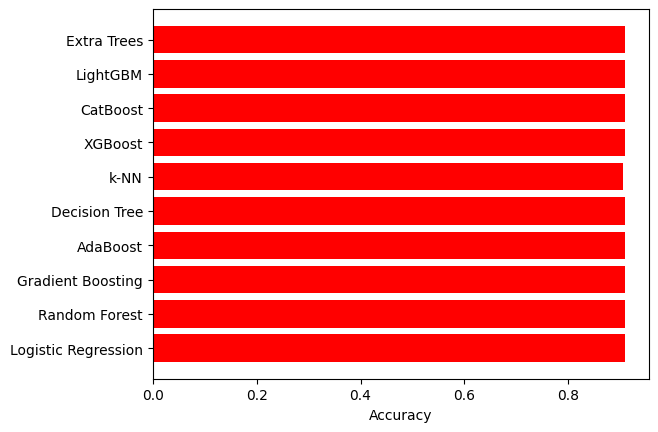

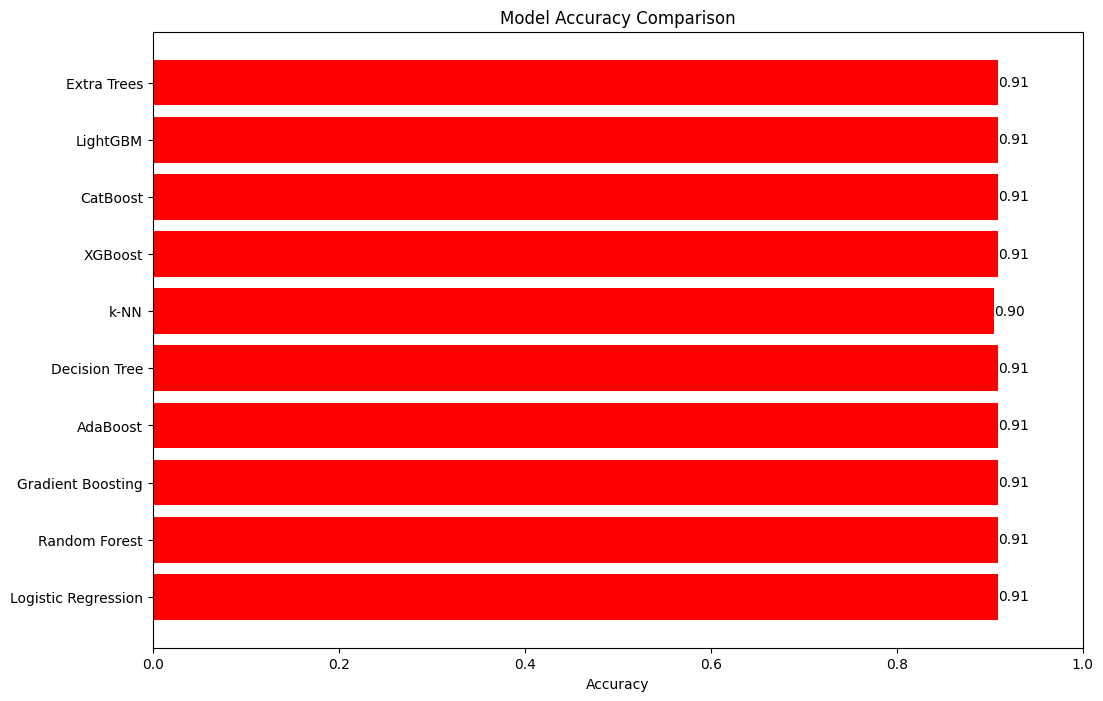

In [22]:
# Convert results to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
# Plotting the results
bars = plt.barh(results_df['Model'], results_df['Accuracy'], color='red')
plt.xlabel('Accuracy')
plt.figure(figsize=(12, 8))
plt.barh(results_df['Model'], results_df['Accuracy'], color='red')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Assuming accuracy is between 0 and 1
# Add accuracy values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center')
plt.savefig('model_accuracy_comparison.png')
plt.show()

In [23]:
# Save results to CSV
results_df.to_csv('model_accuracy_results.csv', index=False)